# visualize Pascal VOC-format annotations for `searchstims` visual search display stimuli
to make sure that bounding boxes are where they should be

In [1]:
from typing import NamedTuple
from pathlib import Path
import math

import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import pyprojroot
from searchnets.transforms import ParseVocXml

In [2]:
class BndBox(NamedTuple):
    xmin : int
    ymin : int
    xmax : int
    ymax : int

    @classmethod
    def from_dict(cls, bndbox_dict):
        """casts "bndbox" value from nested dict of xml annotation to an instance of this NamedTuple"""
        casted = {field: cls.__annotations__[field](value) for field, value in bndbox_dict.items()}
        return cls(**casted)

In [3]:
STIMS_ROOT = pyprojroot.here() / '..' / 'visual_search_stimuli'
ANET_V2_ROOT = STIMS_ROOT / 'alexnet_multiple_stims_v2'

In [4]:
def show_img_w_bndboxes(img, bndboxes, ax=None, dpi=100, edgecolor='y'):
    if ax is None:
        fig, ax = plt.subplots(dpi=100)
    else:
        fig = None

    ax.imshow(img)

    for bndbox in bndboxes:
        h, w = bndbox.ymax - bndbox.ymin, bndbox.xmax - bndbox.xmin

        rect = patches.Rectangle((bndbox.xmin, bndbox.ymin), w, h, 
                                 linewidth=1, edgecolor=edgecolor, facecolor='none')
        ax.add_patch(rect)
        
    ax.set_axis_off()
    
    return fig, ax

In [34]:
def plot_random(df, n_df_rows=16, dpi=300):
    rows = df.sample(n_df_rows)

    nrow = ncol = math.ceil(np.sqrt(n_df_rows))
    fig, ax = plt.subplots(nrow, ncol, dpi=dpi)
    ax = ax.ravel()

    for ind, row in enumerate(rows.itertuples()):
        img_file, xml_file = row.img_file, row.xml_file
        img_file = ANET_V2_ROOT / img_file
        xml_file = ANET_V2_ROOT / xml_file

        img = imageio.imread(img_file)

        xml_parser = ParseVocXml()
        annot = xml_parser(xml_file)
        if isinstance(annot['annotation']['object'], dict):
            bndboxes = [
                BndBox.from_dict(annot['annotation']['object']['bndbox'])
            ]
        elif isinstance(annot['annotation']['object'], list):
            bndboxes = [
                BndBox.from_dict(obj['bndbox']) for obj in annot['annotation']['object']
            ]

        show_img_w_bndboxes(img, bndboxes, ax=ax[ind])

In [30]:
df = pd.read_csv(ANET_V2_ROOT / 'alexnet_multiple_stims.csv')

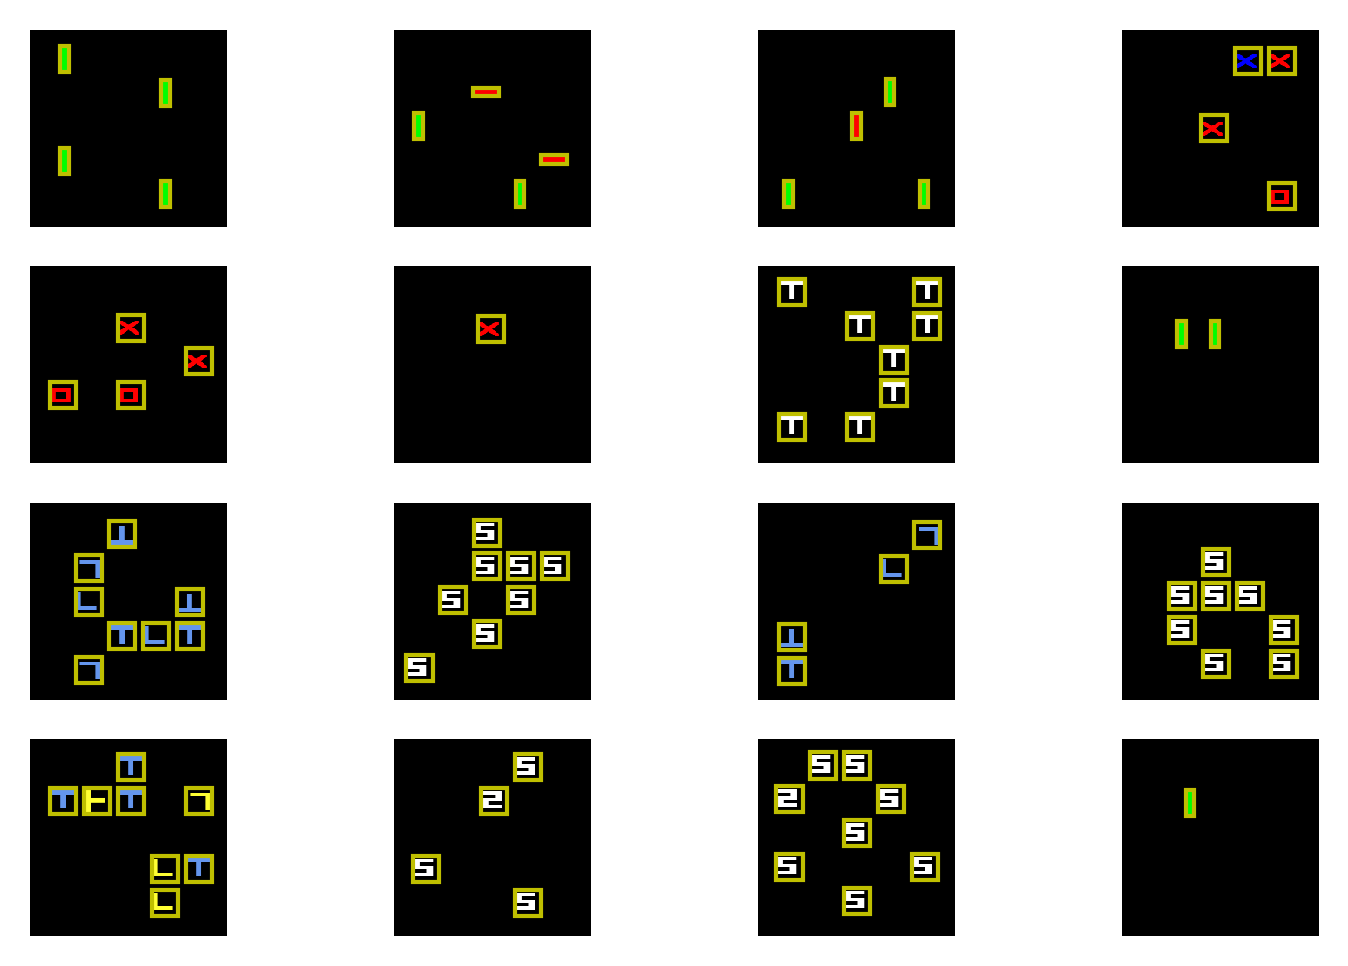

In [36]:
plot_random(df)